# Model Objective

#### Census-income data plays the most important role in the democratic system of government, highly affecting the economic sectors. Census-related figures are used to allocate federal funding by the government to different states and localities.

#### Census data is also used for post census residents estimates and predictions, economic and social science research, and many other such applications. Therefore, the importance of this data and its accurate predictions is very clear to us. The main aim is to increase awareness about how the income factor actually has an impact not only on the individual lives of citizens but also an effect on the nation and its betterment. You will have a look at the data pulled out from the 1994 Census bureau database, and try to find insights into how various features have an effect on the income of an individual.

#### The data contains approximately 32,000 observations with over 15 variables.

#### The strategy is to analyze the data and perform a predictive task of classification to predict whether an individual makes over 50K a year or less by using classification algorithm. 

## 1 Importing preliminary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset

In [4]:
df = pd.read_csv("census-income.csv")

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.1 Attribute information

**Age: the age of an individual.**

**Workclass: The type of work or employment of an individual**

**Fnlwgt: weight assigned to each individual in the dataset**

**Education: The highest level of education completed.**

**Education-num: The number of years of education completed.**

**Marital-status: The marital status.**

**Occupation: Type of work performed by an individual.**

**Relationship: The relationship status.**

**Race: The race of an individual.**

**Sex: The gender of an individual.**

**Capital-gain: The amount of capital gain (financial profit).**

**Capital-loss: The amount of capital loss an individual has incurred.**

**Hours-per-week: The number of hours works per week.**

**Native-country: The country of origin or the native country.**

**Income: The income level of an individual and serves as the target variable. It indicates whether the income is greater than $50,000 or less than or equal to $50,000, denoted as (>50K, <=50K).**

**https://www.kaggle.com/datasets/tawfikelmetwally/census-income-dataset**

### 2.2 General Observation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 2.3 Null Values

In [12]:
df.isnull().sum().sum()

0

### 2.4 Duplicate Values

In [14]:
df.duplicated().sum()

24

In [16]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

### 2.5 Statistical Summary 

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [22]:
df.describe(include="O")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Unnamed: 14
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


### 2.6 Renaming the columns

**Certain columns have a special character '-' in the column name and we will replace the target column name with 'income'**

In [25]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Unnamed: 14'],
      dtype='object')

In [27]:
df.rename(columns = {
    'education-num': "education_num",
    "marital-status": "marital_status",
    "capital-gain": "capital_gain",
    "capital-loss": "capital_loss",
    "hours-per-week": "hours_per_week",
    "native-country": "native_country",
    "Unnamed:14": "income",
}, inplace=True)

In [29]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'Unnamed: 14'],
      dtype='object')

In [31]:
df.rename(columns = {"Unnamed: 14": "income"}, inplace=True)

In [33]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

## 3. Exploratory data analysis & Pre processing

### 3.1 Unique values in columns

In [35]:
for column in df:
    print(f"{column} - ({len(df[column].unique())}): {df[column].unique()} \n")

age - (73): [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass - (9): ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

fnlwgt - (21648): [ 77516  83311 215646 ...  34066  84661 257302] 

education - (16): ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education_num - (16): [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital_status - (7): ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation - (15): ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 '

### 3.2 Data cleaning

#### 3.2.1 Workclass

In [37]:
df["workclass"].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

**We have a workclass '?' which can be treated as null values and can be dropped**

In [39]:
df = df[df["workclass"] != "?"]

In [41]:
df["workclass"].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

#### 3.2.2 Education

In [39]:
df["education"].value_counts()

education
HS-grad         9962
Some-college    6768
Bachelors       5180
Masters         1674
Assoc-voc       1321
11th            1057
Assoc-acdm      1020
10th             833
7th-8th          573
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          302
1st-4th          154
Preschool         45
Name: count, dtype: int64

#### 3.2.3 Marital Status

In [41]:
df["marital_status"].value_counts()

marital_status
Married-civ-spouse       14334
Never-married             9901
Divorced                  4257
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: count, dtype: int64

#### 3.2.4 Occupation

In [43]:
df["occupation"].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
?                       7
Name: count, dtype: int64

**We have 7 values with '?'. These can be treated as null values and dropped**

In [43]:
df = df[df["occupation"] != "?"]

In [45]:
df["occupation"].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

#### 3.2.5 Relationship

In [47]:
df["relationship"].value_counts()

relationship
Husband           12698
Not-in-family      7852
Own-child          4521
Unmarried          3270
Wife               1435
Other-relative      918
Name: count, dtype: int64

#### 3.2.6 Race

In [49]:
df["race"].value_counts()

race
White                 26280
Black                  2907
Asian-Pac-Islander      973
Amer-Indian-Eskimo      286
Other                   248
Name: count, dtype: int64

#### 3.2.7 Sex

In [51]:
df["sex"].value_counts()

sex
Male      20773
Female     9921
Name: count, dtype: int64

#### 3.2.8 Native country

In [53]:
df["native_country"].value_counts()

native_country
United-States                 27487
Mexico                          606
?                               555
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece       

**We have observations where native country is "?". We can drop these values**

In [55]:
df = df[df["native_country"] != "?"]

In [57]:
df["native_country"].value_counts()

native_country
United-States                 27487
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

### 3.3 Encoding

In [59]:
df1 = pd.get_dummies(df[["workclass", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]], drop_first=True)

In [61]:
df1.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
df1["income"] = df["income"].replace(["<=50K", ">50K"], [0,1])

C:\Users\admin\AppData\Local\Temp\ipykernel_10796\1560512708.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["income"] = df["income"].replace(["<=50K", ">50K"], [0,1])


In [65]:
df1.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
0,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,0
1,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
3,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0


### 3.4 Normalizing the columns

In [67]:
from sklearn.preprocessing import StandardScaler

In [69]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [71]:
column = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
scaler = StandardScaler()
df1[column] = scaler.fit_transform(df[column])
df1.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,...,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,False,False,False,False,True,False,False,False,False,True,...,True,False,False,0,0.042516,-1.062676,1.128996,0.145925,-0.218673,-0.078031
1,False,False,False,True,False,False,False,True,False,False,...,True,False,False,0,0.880215,-1.007829,1.128996,-0.147502,-0.218673,-2.332060
2,False,True,False,False,False,False,False,False,False,False,...,True,False,False,0,-0.033639,0.244669,-0.440434,-0.147502,-0.218673,-0.078031
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,0,1.108678,0.425206,-1.225149,-0.147502,-0.218673,-0.078031
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,0,-0.795183,1.406572,1.128996,-0.147502,-0.218673,-0.078031


## 4. Visualization

array([[<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>,
        <Axes: title={'center': 'capital_loss'}>],
       [<Axes: title={'center': 'hours_per_week'}>, <Axes: >, <Axes: >]],
      dtype=object)

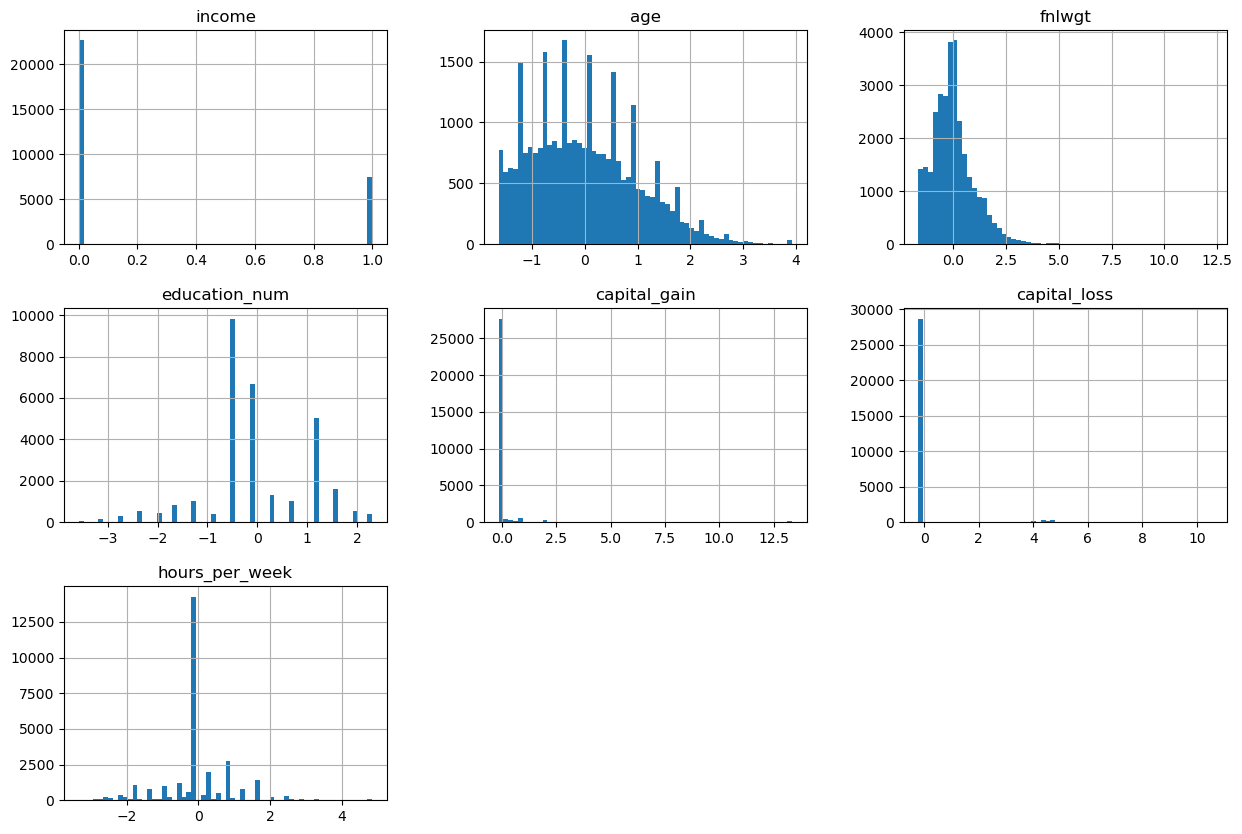

In [73]:
df1.hist(figsize=(15,10), bins=60)

## 5. Train, Test, Split 

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
X=df1.drop("income", axis=1)
y=df1["income"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [81]:
X_train.shape

(24111, 81)

In [83]:
X_test.shape

(6028, 81)

In [85]:
y_train.shape

(24111,)

In [87]:
y_test.shape

(6028,)

## 6. Model Implementation

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
clf_report = classification_report(y_test, y_pred_rfc)

print(f"confusion Matrix: \n {cm_rfc}")
print(f"Classification Report: \n {clf_report}")

confusion Matrix: 
 [[4171  314]
 [ 544  999]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4485
           1       0.76      0.65      0.70      1543

    accuracy                           0.86      6028
   macro avg       0.82      0.79      0.80      6028
weighted avg       0.85      0.86      0.85      6028



**Our model does an excellent job of predicting for class '0' i.e. <=50K but gives an average performance on class '1' i.e. >50K**

## 7. Hyper Parameter Tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
from scipy.stats import randint

In [102]:
param_select = {"criterion": ["gini", "entropy"],
               "min_samples_leaf": randint(1,6),
               "min_samples_split": randint(2,10),
               "max_depth": randint(5,40),
               "n_estimators": randint(5,250)}

In [104]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_select, n_iter=100, cv=5, n_jobs=-1)

In [106]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029162377A10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029160A178F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029160874530>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000291623CB0E0>})

In [108]:
best_parameters = random_search.best_params_

In [110]:
best_parameters

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 232}

In [112]:
best_score = random_search.best_score_

In [114]:
best_score

0.8614322374994764

In [116]:
y_pred_random = random_search.predict(X_test)

In [118]:
cm_random = confusion_matrix(y_test, y_pred_random)
clf_random = classification_report(y_test, y_pred_random)

print(f"Confusion Matrix: \n: {cm_random}")
print(f"Classification Report: \n: {clf_random}")

Confusion Matrix: 
: [[4239  246]
 [ 587  956]]
Classification Report: 
:               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4485
           1       0.80      0.62      0.70      1543

    accuracy                           0.86      6028
   macro avg       0.84      0.78      0.80      6028
weighted avg       0.86      0.86      0.86      6028



**There is no significant difference observed in the model performance after tuning the parameters**

## We can conclude that we can achieve a model with an overall accuracy of 86%. The model performs well on class '0' i.e. income <=50K whereas it underperforms on class = '1' i.e >50K

### Assignment questions

**1) What is the biggest advantage that helps random forest classifiers to triumph over the decision trees?**

**A. It has shown great predictive results over decision tree models.**

**B. It Combines all positive predictions from all decision trees**

**C. It works on the bagging method(bootstrap method)**

**D. All of the above**

**Answer is C. It works on the bagging method**

- **Option A can also be correct here. Random forest generally gives better predictions over Decision Tree but this cannot be used as a factual statement**

**2) In a given problem where you have a very large dataset with both continuous and categorical features, why would you choose the random forest classifier?**

**A. All of the below**

**B. Works well with the high dimensional data**

**C. High accuracy with less need for interpretation**

**D. Random forest can work on both regression and classification problem**


**Answer is D. Random forest can work on both regression and classification problem**

**3) Which of the following techniques is used in the Random Forest model?**

**A. Boosting**

**B. Bagging**

**C. Ensemble**

**D. None of the above**

- **Bagging and Ensemble both are correct answers**

**4) Choose the percentage of population with income greater than 50K income?**

**A. 24.8%**
**B. 75.5%**
**C. 35.5%**
**D. 25.2%**

In [130]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [133]:
df.shape

(30139, 15)

In [129]:
df.rename(columns = {"Unnamed: 14": "income"}, inplace=True)

In [135]:
#The operations are performed after the data cleaning performed earlier

In [131]:
df["income"].value_counts(normalize=True)

income
<=50K    0.750954
>50K     0.249046
Name: proportion, dtype: float64

**Answer is B. 75.5%**

In [138]:
df.rename(columns = {
    'education-num': "education_num",
    "marital-status": "marital_status",
    "capital-gain": "capital_gain",
    "capital-loss": "capital_loss",
    "hours-per-week": "hours_per_week",
    "native-country": "native_country",
}, inplace=True)

**5) Compute how many samples of the population are never married and working hours less than 20 hours?**

**A. 134**
**B. 123**
**C. 127**
**D. 785**

In [165]:
#After data cleaning
df["marital_status"][(df["marital_status"]=="Never-married") & (df["hours_per_week"]<20)].count()

785

**Answer is D.785**

**6) Choose the correct list of age with minimum age , maximum and 50th Percentile of the age group?**

**A. [15,95,37]**

**B. All**

**C. [17,90,36]**

**D. [17,90,37]**

In [170]:
df["age"].describe()

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

**Answer is D. [17, 90, 37]**

**7. From the above census data which country has the highest population and  the lowest population?**

In [172]:
df["native_country"].describe()

count             30162
unique               41
top       United-States
freq              27504
Name: native_country, dtype: object

In [174]:
df["native_country"].value_counts()

native_country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

**Answer is United-States & Holland-Netherlands**

**8) How does n_estimators work in the random forest classifier?**

**A. Number of decision trees**

**B. Number of iterations**

**C. Number of random forests for the classifier**

**D. Training reports**

**Aswer is A. Number of Decision Trees**

**9) Can the target data for the random forest model be categorical or continuous value?**

**No**

**Yes**

**Answer is Yes**

**10) How can you use hyperparameter tuning to your advantage while working with the random forest classifier?**

**A. Standardization of the data**

**B. Improve the model's performance**

**C. Normalize the features**

**D. All of the above**

**Answer is A. Imporve the model's performance**

**11) Select the best hyperparameters by RandomSearchCV and fit the model with the best hyperparameters and compute the accuracy score of the model.**

**A. 50% to 70%**
**B. 30% to 70%**
**C. 85% and above**
**D. None of the above**

**Answer is 85% and above**

**12) Which of the following Two features are most important in Random forest model?**

**A. Correlation between 2 trees and how strong an individual tree is**

**B. Predict_proba**

**C. Sensitivity and specificity**

**D. None of the above**

**Answer is A. Correlation between 2 trees and how strong and individual tree is**

- **Although the above options is not a feature of Random Forest model, but having low correlation between 2 trees can improve the performance of the model**
- **If there is high correlation between the trees, the same errors will be repeated across the trees. While majority voting at the time of aggregation, it could also result in overfitting. Low correlation ensures the errors of multiple decision trees are not compounded, rather they tend to cancel out each other while aggregating and it also avoids overfitting**

**13) Based on what values, the feature importance will be calculated?**

**A. mean increase gini and mean increase accuracy**

**B. mean increase gini and mean decrease accuracy**

**C. Mean decrease gini and mean decrease accuracy**

**D. All of the above**

**Answer is C. Mean Decrease gini and mean decrease accuracy**

- **Mean decrease gini measures how much every feature contributes towards reducing the gini impurity across all the trees and node where it is used**
- **For each feature, this decrease is averaged across all the tress in the forest to give its importance score**
- **Higher the mean decreased gini, the higher is the features' contribution in determining the split and in helping the model's predictive performance** 

- **Mean decrease accuracy measures the drop in accuracy after the values of features are shuffled randomly or removed**
- **In random forest, first a baseline accuracy is calculated by training the model on all features**
- **For each features, its values are shuffled or removed in the validation set and the accuracy is measured again**
- **If the drop in accuracy from the baseline accuracy is higher, then the feature is important for the model**


**14) From the above model, state the disadvantage of the random forest?**

**A. None of the above**

**B. It is same as all the other models**

**C. It is a time consuming model building process**

**D. It's training time is huge due to the complexity of the model**

**Answer is C and D are correct**

**15) Which are the two methods used for hyperparameter tuning and cross-validation?**

**A. GridSearchCV**

**B. RandomizedSearchCV and GridSearchCV**

**C. RandomForestClassifier**

**D. RandomizedSearchCV**

**Answer is B**